# Explore here

In [21]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#loading dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
#Exploring the data
total_data.shape

(48895, 16)

In [24]:
#grabbing column
total_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [26]:
#looking for missing data
print("Total missing value for each column")
print(total_data.isnull().sum(axis=0))

Total missing value for each column
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [27]:
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
id                                0.0000
name                              0.0003
host_id                           0.0000
host_name                         0.0004
neighbourhood_group               0.0000
neighbourhood                     0.0000
latitude                          0.0000
longitude                         0.0000
room_type                         0.0000
price                             0.0000
minimum_nights                    0.0000
number_of_reviews                 0.0000
last_review                       0.2056
reviews_per_month                 0.2056
calculated_host_listings_count    0.0000
availability_365                  0.0000
dtype: float64


In [28]:
#Eliminate duplicates
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (48895, 16)
Dimensions after dropping duplicates: (48895, 16)


In [29]:
#Eliminate Irrelevant information
columns_to_remove = ["id", "name", "host_id", "last_review", "latitude", "longitude"]

for column in columns_to_remove:
    try:
        total_data = total_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")

total_data.head(5)


,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [30]:
#Missing Value
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
host_name                         0.0004
neighbourhood_group               0.0000
neighbourhood                     0.0000
room_type                         0.0000
price                             0.0000
minimum_nights                    0.0000
number_of_reviews                 0.0000
reviews_per_month                 0.2056
calculated_host_listings_count    0.0000
availability_365                  0.0000
dtype: float64


In [31]:
#checking for duplicates
total_data['host_name'].duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892    False
48893     True
48894     True
Name: host_name, Length: 48895, dtype: bool

In [32]:

total_data[total_data['host_name'].duplicated()]

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
22,Lisel,Brooklyn,Park Slope,Private room,80,1,39,0.37,6,364
23,Lisel,Brooklyn,Park Slope,Private room,110,2,71,0.61,6,304
33,Ssameer Or Trip,Manhattan,Harlem,Private room,50,3,273,2.37,3,359
35,Laurie,Brooklyn,South Slope,Private room,89,4,168,1.41,3,340
39,Ben,Manhattan,Lower East Side,Shared room,40,1,214,1.81,4,188
...,...,...,...,...,...,...,...,...,...,...
48889,Michael,Queens,Jamaica,Private room,65,1,0,NaN,2,163
48890,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48893,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [33]:
total_data.drop("host_name", axis = 1)#.duplicated().sum()


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


In [34]:
#checking for duplicates
total_data['host_name'].duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892    False
48893     True
48894     True
Name: host_name, Length: 48895, dtype: bool

In [35]:
#checking host with most reviews
total_data[['host_name', 'number_of_reviews']]

,host_name,number_of_reviews
0,John,9
1,Jennifer,45
2,Elisabeth,0
3,LisaRoxanne,270
4,Laura,9
...,...,...
48890,Sabrina,0
48891,Marisol,0
48892,Ilgar & Aysel,0
48893,Taz,0


In [36]:
#host with most review per month
total_data[['host_name', 'reviews_per_month']]

,host_name,reviews_per_month
0,John,0.21
1,Jennifer,0.38
2,Elisabeth,NaN
3,LisaRoxanne,4.64
4,Laura,0.10
...,...,...
48890,Sabrina,NaN
48891,Marisol,NaN
48892,Ilgar & Aysel,NaN
48893,Taz,NaN


In [37]:
total_data.describe() 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


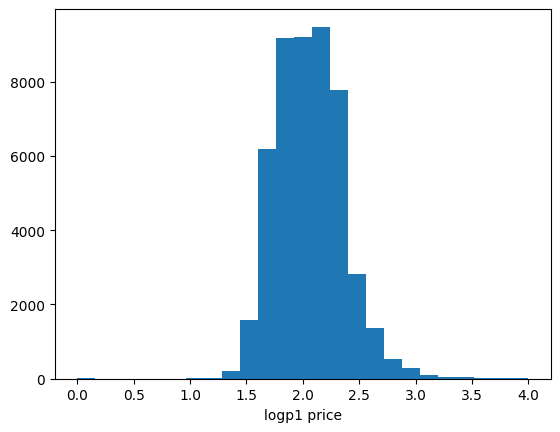

In [38]:
import numpy as np
plt.hist(np.log10(total_data['price']+1), bins=25)
plt.xlabel('logp1 price')
plt.show()

In [53]:
#category
total_data.head()

,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [54]:
#Removing NaN from my dataset
total_data_cleaned = total_data.dropna()


In [56]:
total_data_cleaned = total_data.dropna(subset=['reviews_per_month'])


In [57]:
total_data_cleaned = total_data.dropna(axis=1)


In [58]:
na_percentage = total_data.isna().mean().round(4) * 100
print(na_percentage)


host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64


In [59]:
threshold = 20.56 # Example threshold
columns_to_drop = na_percentage[na_percentage > threshold].index
total_data_cleaned = total_data.drop(columns=columns_to_drop)


In [60]:
total_data.isnull().sum()


host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [61]:
(total_data.isnull().sum().sort_values() / len(total_data) * 100).round(3)


neighbourhood_group                0.000
neighbourhood                      0.000
room_type                          0.000
price                              0.000
minimum_nights                     0.000
number_of_reviews                  0.000
calculated_host_listings_count     0.000
availability_365                   0.000
host_name                          0.043
reviews_per_month                 20.558
dtype: float64

In [75]:
# Our current dataset has 1 categorical columns: neighbourhood_group, neighbourhood, room_type
total_data.head()

,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_name_n,neighbourhood_n,room_type_n
0,Brooklyn,149,1,9,0.21,6,365,0,0,0
1,Manhattan,225,1,45,0.38,2,355,1,1,1
2,Manhattan,150,3,0,NaN,1,365,2,2,0
3,Brooklyn,89,1,270,4.64,1,194,3,3,1
4,Manhattan,80,10,9,0.10,1,0,4,4,1


In [77]:
# Making last new columns into numeric representation of the original categorical column
total_data['neighbourhood_group_n'] = pd.factorize(total_data['neighbourhood_group'])[0]


total_data.head()

,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_name_n,neighbourhood_n,room_type_n,neighbourhood_group_n
0,Brooklyn,149,1,9,0.21,6,365,0,0,0,0
1,Manhattan,225,1,45,0.38,2,355,1,1,1,1
2,Manhattan,150,3,0,NaN,1,365,2,2,0,1
3,Brooklyn,89,1,270,4.64,1,194,3,3,1,0
4,Manhattan,80,10,9,0.10,1,0,4,4,1,1


In [78]:
	
# Drop the original categorical columns
total_data = total_data.drop(['neighbourhood_group'], axis=1)
total_data.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_name_n,neighbourhood_n,room_type_n,neighbourhood_group_n
0,149,1,9,0.21,6,365,0,0,0,0
1,225,1,45,0.38,2,355,1,1,1,1
2,150,3,0,NaN,1,365,2,2,0,1
3,89,1,270,4.64,1,194,3,3,1,0
4,80,10,9,0.10,1,0,4,4,1,1


In [79]:
#Training and Testing Data
#presents all features excluding the target
X = total_data[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_n', 'neighbourhood_n', 'host_name_n','room_type_n']] # A dataframe (double brackets)

# y contains our target feature
y = total_data['price'] # A series (single brackets)

In [80]:
X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,host_name_n,room_type_n
0,1,9,0.21,6,365,0,0,0,0
1,1,45,0.38,2,355,1,1,1,1
2,3,0,NaN,1,365,1,2,2,0
3,1,270,4.64,1,194,0,3,3,1
4,10,9,0.10,1,0,1,4,4,1


In [81]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [83]:
nrows, ncolumns = total_data.shape

print(f"Our entire dataset has {nrows} rows.")
print(f"Our training set should have 80% of our data so it should have {int(0.8*nrows)} rows.")
print(f"Our test set should have 20% of our data so it should have {int(0.2*nrows)} rows.")


Our entire dataset has 48895 rows.
Our training set should have 80% of our data so it should have 39116 rows.
Our test set should have 20% of our data so it should have 9779 rows.


In [84]:
X_train


,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,host_name_n,room_type_n
37476,2,13,1.72,3,321,0,6,2479,0
38826,2,0,NaN,1,0,1,7,427,1
42785,29,0,NaN,327,335,1,71,9596,1
29591,2,0,NaN,1,0,4,169,8034,0
20604,1,3,0.10,1,0,0,6,249,0
...,...,...,...,...,...,...,...,...,...
32837,30,3,0.26,103,207,1,4,8639,0
43900,3,3,1.10,9,8,1,28,626,0
46254,5,0,NaN,1,43,0,12,10936,0
9861,1,63,1.34,2,250,2,46,5,0


In [85]:
y_train

37476      63
38826     430
42785     175
29591      45
20604      38
         ... 
32837      34
43900      95
46254     100
9861       45
45891    1800
Name: price, Length: 39116, dtype: int64

In [86]:
X_test

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,host_name_n,room_type_n
46885,2,0,NaN,1,88,1,64,915,1
46057,1,17,13.42,1,157,2,124,10888,0
38038,1,45,5.74,3,83,0,73,2597,0
3752,1,0,NaN,1,0,1,7,1838,1
15104,4,0,NaN,1,0,1,28,315,1
...,...,...,...,...,...,...,...,...,...
22519,4,2,0.08,3,0,1,1,5190,1
14008,2,47,1.14,1,205,1,52,755,1
9764,2,1,0.02,1,0,1,2,160,1
16936,1,11,0.29,1,0,1,2,5347,1


In [87]:
y_test

46885    203
46057     65
38038     55
3752     350
15104    175
        ... 
22519    134
14008    200
9764     109
16936    157
23964    100
Name: price, Length: 9779, dtype: int64

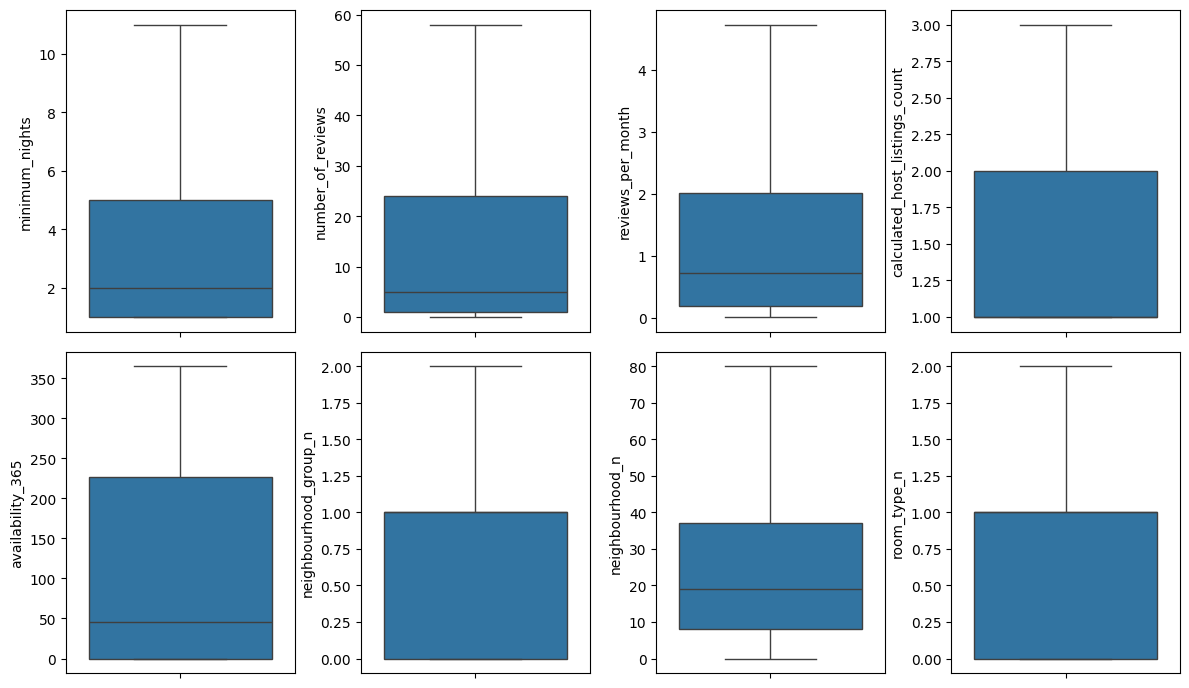

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize = (12, 7))  # Adjust the number of columns to 5


# Create boxplots for the first 8 features
sns.boxplot(ax=axis[0, 0], data=X_train, y="minimum_nights")
sns.boxplot(ax=axis[0, 1], data=X_train, y="number_of_reviews")
sns.boxplot(ax=axis[0, 2], data=X_train, y="reviews_per_month")
sns.boxplot(ax=axis[0, 3], data=X_train, y="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 0], data=X_train, y="availability_365")
sns.boxplot(ax=axis[1, 1], data=X_train, y="neighbourhood_group_n")
sns.boxplot(ax=axis[1, 2], data=X_train, y="neighbourhood_n")
sns.boxplot(ax=axis[1, 3], data=X_train, y="room_type_n")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()


In [101]:
def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test
    

In [102]:
X_train, X_test = replace_outliers(X_train, X_test)

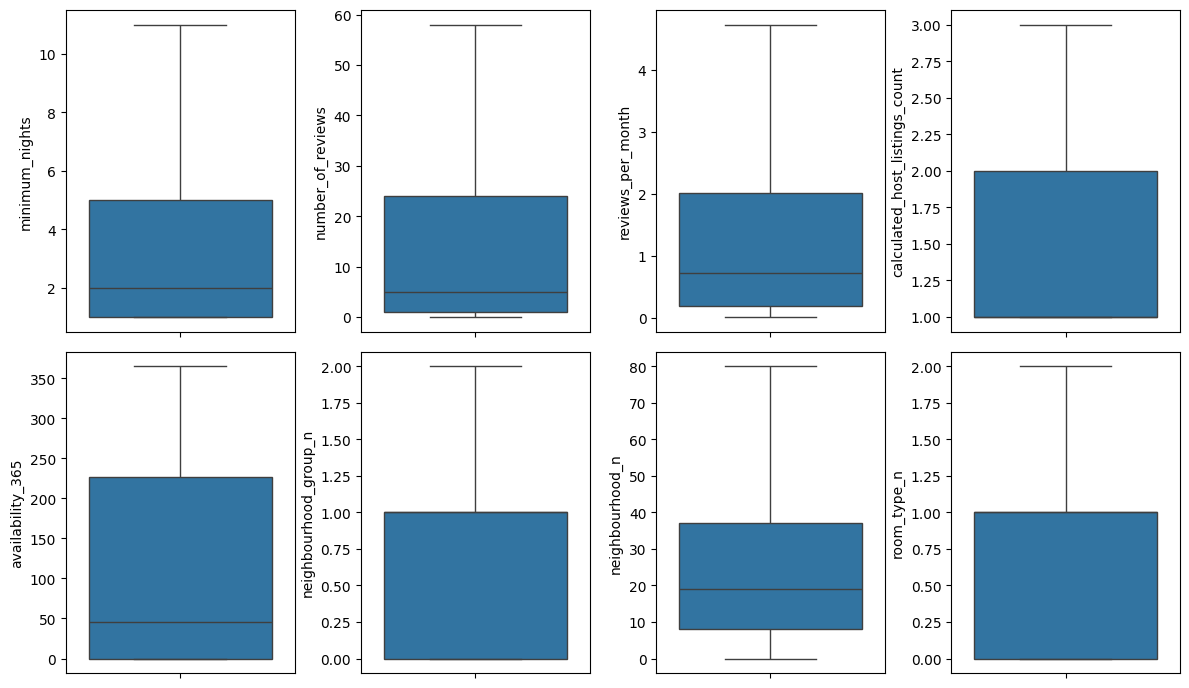

In [103]:
fig, axis = plt.subplots(2, 4, figsize = (12, 7))

sns.boxplot(ax = axis[0, 0], data = X_train, y = "minimum_nights")
sns.boxplot(ax = axis[0, 1], data = X_train, y = "number_of_reviews")
sns.boxplot(ax = axis[0, 2], data = X_train, y = "reviews_per_month")
sns.boxplot(ax = axis[0, 3], data = X_train, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = X_train, y = "availability_365")
sns.boxplot(ax = axis[1, 1], data = X_train, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[1, 2], data = X_train, y = "neighbourhood_n")
sns.boxplot(ax = axis[1, 3], data = X_train, y = "room_type_n")

plt.tight_layout()

plt.show()

Missing Value Analysis

In [104]:
print("Total missing values for each column in our X_train:")
print(X_train.isnull().sum(axis=0))

Total missing values for each column in our X_train:
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8030
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_n                0
neighbourhood_n                      0
host_name_n                          0
room_type_n                          0
dtype: int64


In [105]:
print("Total missing values for each column in our X_test:")
print(X_test.isnull().sum(axis=0))

Total missing values for each column in our X_test:
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2022
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_n                0
neighbourhood_n                      0
host_name_n                          0
room_type_n                          0
dtype: int64


In [106]:
def replace_missing_vaues(x_train, x_test):
    columns = x_train.columns

    # This loop will replace missing vaues for each column
    for column in columns:
        # Find the mean using the training data points
        mean_value = x_train[column].mean()

        # Replace missing values with the mean for the column in both the training and test sets
        x_train[column] = x_train[column].fillna(mean_value)
        x_test[column] = x_test[column].fillna(mean_value)

    return x_train, x_test

In [107]:
X_train, X_test = replace_missing_vaues(X_train, X_test)


In [108]:
print("Total missing values for each column in our X_train:")
print(X_train.isnull().sum(axis=0))

Total missing values for each column in our X_train:
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
neighbourhood_n                   0
host_name_n                       0
room_type_n                       0
dtype: int64


Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


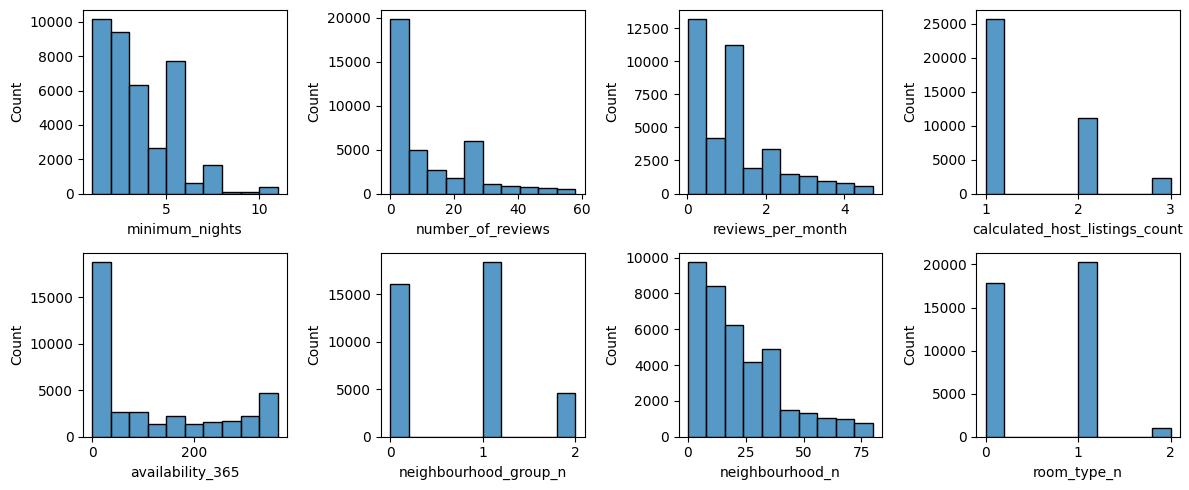

In [112]:
##feature from X_train
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_train, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_train, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_train, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_train, x = "availability_365", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_train, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_train, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_train, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

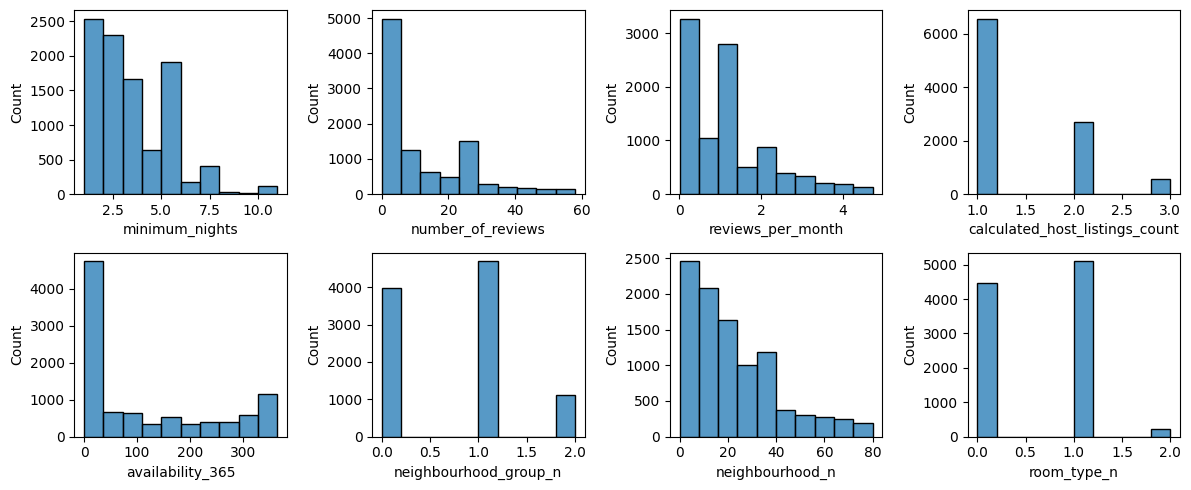

In [111]:
#feature from X_test
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_test, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_test, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_test, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_test, x = "availability_365", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_test, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_test, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_test, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

In [113]:
scaler.fit(X_train)

StandardScaler()

In [114]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_train_scaled


array([[-5.34150730e-01,  1.18212359e-01,  5.24996110e-01, ...,
        -9.09017356e-01, -7.81092416e-02, -1.04725684e+00],
       [-5.34150730e-01, -8.54551300e-01,  2.11040137e-16, ...,
        -8.54108562e-01, -7.69132876e-01,  7.97243070e-01],
       [ 1.05019626e+00, -8.54551300e-01,  2.11040137e-16, ...,
         2.66005424e+00,  2.31858433e+00,  7.97243070e-01],
       ...,
       [ 1.05019626e+00, -8.54551300e-01,  2.11040137e-16, ...,
        -5.79564593e-01,  6.16029388e-01, -1.04725684e+00],
       [-1.06226639e+00,  9.41320071e-01,  1.63828803e-01, ...,
         1.28733440e+00, -9.11243975e-01, -1.04725684e+00],
       [ 1.05019626e+00, -8.54551300e-01,  2.11040137e-16, ...,
         7.93155253e-01,  6.16029388e-01,  7.97243070e-01]])

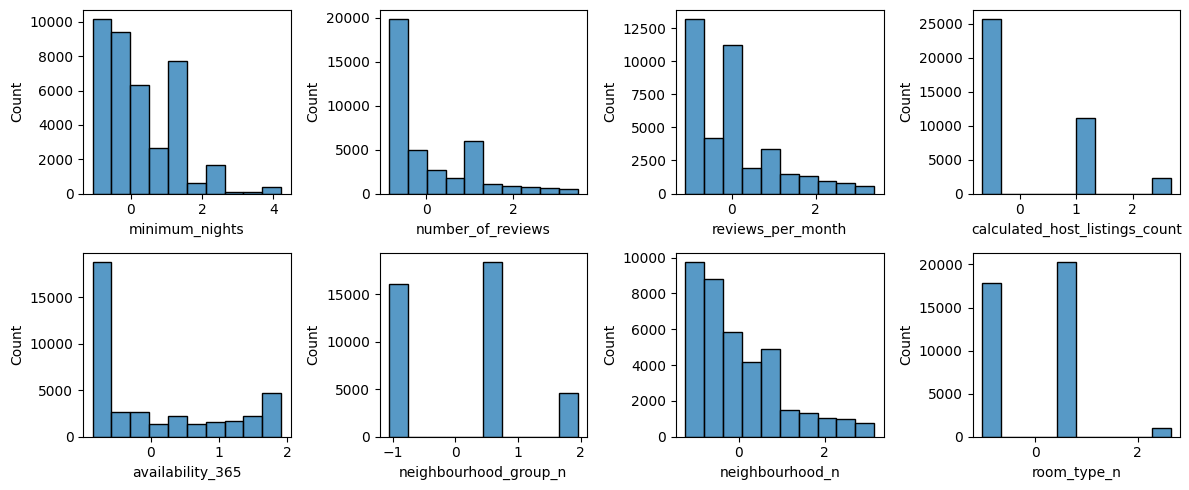

In [116]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train_scaled_df, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_train_scaled_df, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_train_scaled_df, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_train_scaled_df, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_train_scaled_df, x = "availability_365", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_train_scaled_df, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_train_scaled_df, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_train_scaled_df, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

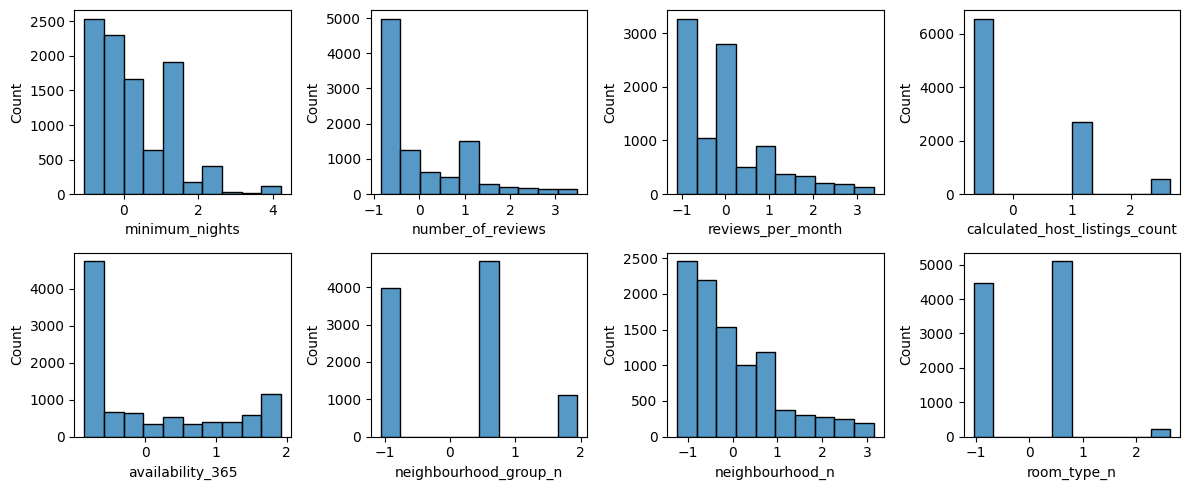

In [117]:
# Convert scaled data back to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test_scaled_df, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_test_scaled_df, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_test_scaled_df, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_test_scaled_df, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_test_scaled_df, x = "availability_365", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_test_scaled_df, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_test_scaled_df, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_test_scaled_df, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

In [118]:
from sklearn.feature_selection import f_classif, SelectKBest

# k = 5 selects the 5 most relevant features for predicting `price`
selection_model = SelectKBest(f_classif, k = 5)

# Notice that we are using X_train_scaled and y_train here
selection_model.fit(X_train_scaled, y_train)

SelectKBest(k=5)

In [119]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])

In [120]:
X_train_sel


,calculated_host_listings_count,availability_365,neighbourhood_n,host_name_n,room_type_n
0,2.672815,1.580867,-0.909017,-0.078109,-1.047257
1,-0.669624,-0.858331,-0.854109,-0.769133,0.797243
2,1.001595,1.687249,2.660054,2.318584,0.797243
3,-0.669624,-0.858331,0.793155,1.792571,-1.047257
4,-0.669624,-0.858331,-0.909017,-0.829075,-1.047257
...,...,...,...,...,...
39111,1.001595,0.714610,-1.018835,1.996309,-1.047257
39112,1.001595,-0.797541,0.298976,-0.702118,-1.047257
39113,-0.669624,-0.531585,-0.579565,0.616029,-1.047257
39114,1.001595,1.041356,1.287334,-0.911244,-1.047257


In [121]:
X_test_sel

,calculated_host_listings_count,availability_365,neighbourhood_n,host_name_n,room_type_n
0,-0.669624,-0.189641,2.275693,-0.604796,0.797243
1,-0.669624,0.334672,0.793155,0.616029,-1.047257
2,2.672815,-0.227635,2.769872,-0.038372,-1.047257
3,-0.669624,-0.858331,-0.854109,-0.293970,0.797243
4,-0.669624,-0.858331,0.298976,-0.806850,0.797243
...,...,...,...,...,...
9774,2.672815,-0.858331,-1.183561,0.834837,0.797243
9775,-0.669624,0.699412,1.616787,-0.658677,0.797243
9776,-0.669624,-0.858331,-1.128653,-0.859047,0.797243
9777,-0.669624,-0.858331,-1.128653,0.887707,0.797243


In [122]:
dict(zip(X_train.columns,selection_model.scores_))


{'minimum_nights': 2.108386083344361,
 'number_of_reviews': 2.2613802243865306,
 'reviews_per_month': 1.6300292777315784,
 'calculated_host_listings_count': 4.085819948224545,
 'availability_365': 3.5844632397507676,
 'neighbourhood_group_n': 1.1630250416221288,
 'neighbourhood_n': 2.4332899062331954,
 'host_name_n': 3.100241690721145,
 'room_type_n': 32.25181669876862}

Build linear regression model

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the model
model = LinearRegression()

In [124]:
#train model using training set from feature
model.fit(X_train_sel, y_train)


LinearRegression()

In [125]:
# Use the model to make predictions using the test set with the selected features
y_pred = model.predict(X_test_sel)

# Compare the model's predictions with the actual values of `y_test`
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 43158.11804189364


In [126]:
from sklearn.metrics import r2_score

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.05929125536930313
